# Цель

Выбрать любой датасет для задачи бинарной классификации. Построить SVM и выборать оптимальное ядро.

# Выбор датасета

Наборы данных содержат транзакции, совершенные с помощью кредитных карт в сентябре 2013 года европейскими держателями карт. В этом наборе данных представлены транзакции, которые произошли за два дня, и у нас 492 мошенничества из 284 807 транзакций. Набор данных сильно несбалансирован, на положительный класс (мошенничество) приходится 0,172% всех транзакций.

Он содержит только числовые входные переменные, которые являются результатом преобразования PCA. К сожалению, из-за проблем конфиденциальности мы не можем предоставить оригинальные функции и дополнительную справочную информацию о данных. Функции V1, V2, ... V28 являются основными компонентами, полученными с помощью PCA, единственными функциями, которые не были преобразованы с помощью PCA, являются «Время» и «Сумма». Функция «Время» содержит секунды, прошедшие между каждой транзакцией и первой транзакцией в наборе данных. Функция «Сумма» - это сумма транзакции, эта функция может использоваться для примера, зависящего от стоимости обучения. Функция «Класс» - это переменная ответа, которая принимает значение 1 в случае мошенничества и 0 в противном случае.

https://www.kaggle.com/mlg-ulb/creditcardfraud

In [1]:
import time
import re
# from __future__ import print_function
from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import make_union, make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler, LabelEncoder, MinMaxScaler,  Imputer, LabelBinarizer, OneHotEncoder
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegressionCV
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR

import xgboost as xgb
# import lightgbm as lgb

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 8)
pd.options.display.float_format = '{:.2f}'.format

# EDA

In [2]:
df = pd.read_csv('data/creditcard.csv')

## 1. Анализ целевой переменной

In [3]:
df_class_info = pd.DataFrame(df['Class'].value_counts())
_class_summ = df_class_info['Class'].sum()
df_class_info['Proportial'] = df_class_info['Class'].apply(lambda x: x*100/_class_summ)
df_class_info

,Class,Proportial
0,284315,99.83
1,492,0.17


## 2. Анализ признаков

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

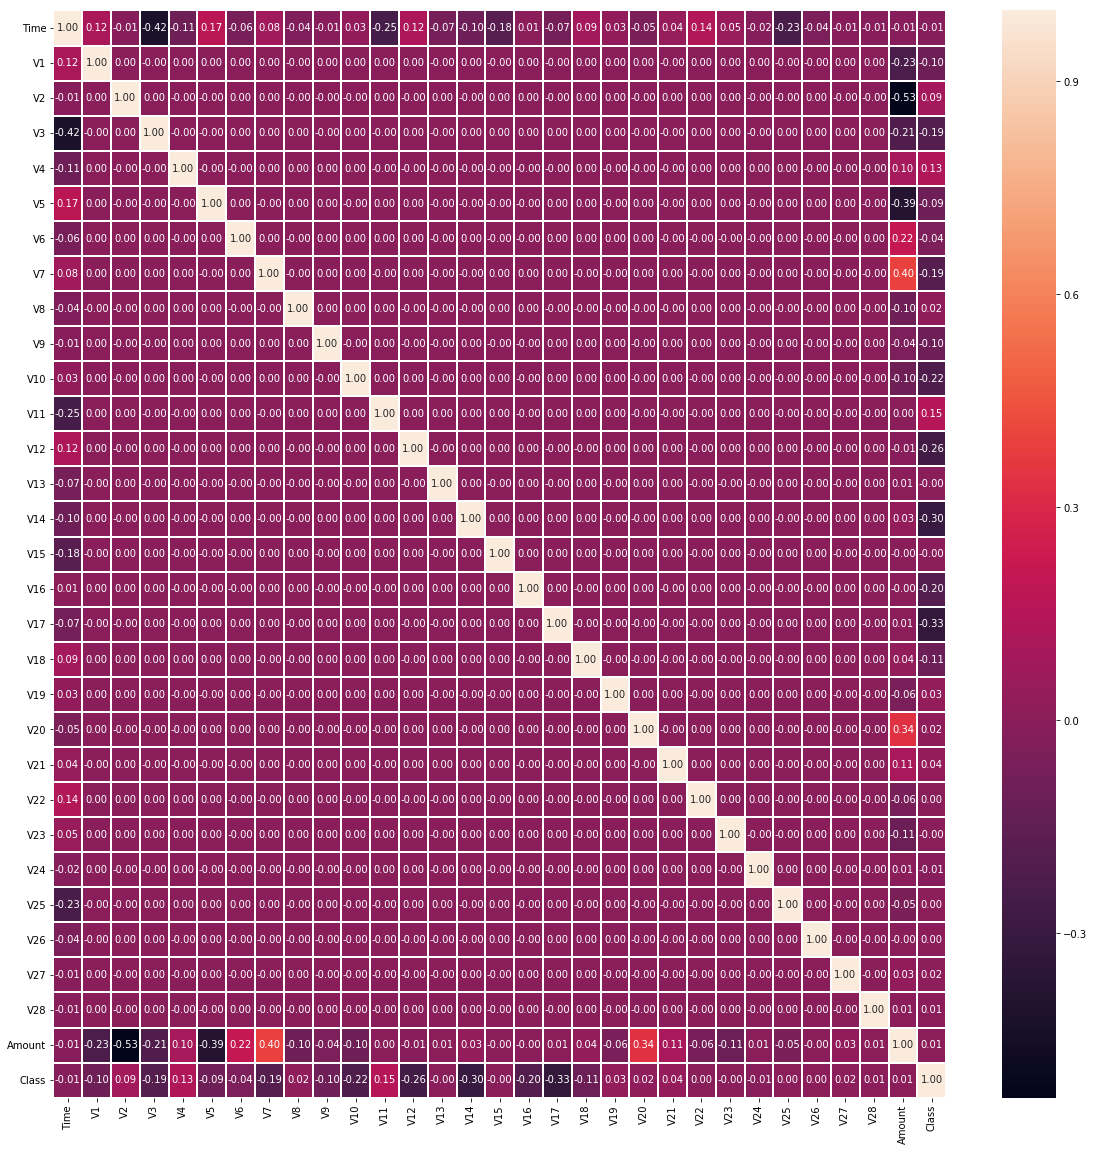

In [26]:
fig, ax = plt.subplots(figsize=(20,20)) 
sns.heatmap(df.corr(), annot=True, linewidths=1, fmt='.2f',ax=ax);

In [ ]:
# sns.pairplot(df[['Time','V1','V2','Class']],hue='Class');

In [ ]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df, test_size = 0.3)

In [ ]:
from sklearn.svm import SVC # "Support vector classifier"
model = SVC(kernel='linear', C=1E10)
model.fit(X, y)